# Scenario Discovery

<!-- ![title](figs/SD.png) -->
<img src="figs/SD.png" alt="Drawing" style="width: 800px;"/>

In [15]:
from lakemodel_function import lake_problem

from ema_workbench import (Model, RealParameter, ScalarOutcome)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_problem)
lake_model.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step
lake_model.levers = [RealParameter(f"l{i}", 0, 0.1) for i in 
                     range(lake_model.time_horizon)] # we use time_horizon here

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P'),
                       ScalarOutcome('utility'),
                       ScalarOutcome('inertia'),
                       ScalarOutcome('reliability')]

In [16]:
from ema_workbench import Policy, ema_logging, MultiprocessingEvaluator

ema_logging.log_to_stderr(ema_logging.INFO)

policy = Policy("no release", **{l.name:0 for l in lake_model.levers})
n_scenarios = 1000

with MultiprocessingEvaluator(lake_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios, policy)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [17]:
maxp = outcomes['max_P']

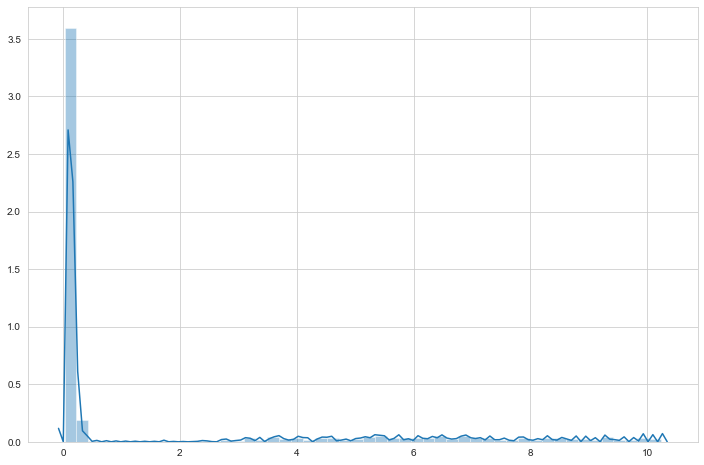

In [18]:
fig, ax = plt.subplots()
sns.distplot(maxp, ax=ax)
plt.show()

In [19]:
np.sum(maxp > 0.5)

224

In [22]:
from ema_workbench.analysis import prim

x = experiments
y = maxp > 0.5

primalg = prim.Prim(x, y, 0.8)
box1 = primalg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 1000 points remaining, containing 224 cases of interest
[MainProcess/INFO] mean: 0.9473684210526315, mass: 0.095, coverage: 0.4017857142857143, density: 0.9473684210526315 restricted_dimensions: 4


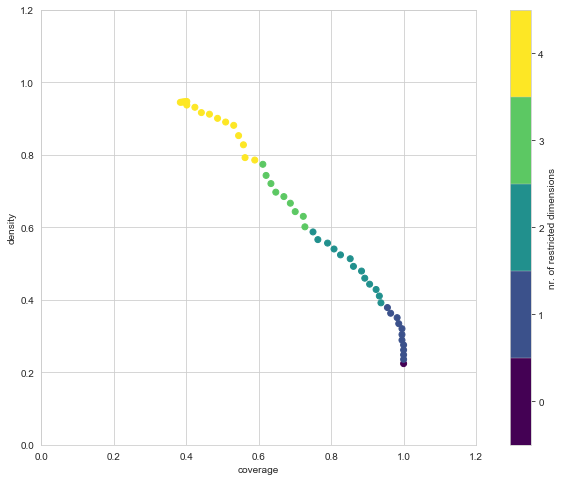

In [24]:
box1.show_tradeoff()
plt.show()

In [25]:
box1.inspect(34)

coverage    0.589286
density     0.785714
id                34
mass           0.168
mean        0.785714
res_dim            4
Name: 34, dtype: object

         box 34                                          
            min       max                       qp values
b      0.100193  0.227406   [-1.0, 7.989336145854012e-28]
q      2.000838  3.810628  [-1.0, 5.4453646128672276e-05]
delta  0.930037  0.987729     [-1.0, 0.39952454806126225]
mean   0.023761  0.049970   [8.112415195225006e-06, -1.0]



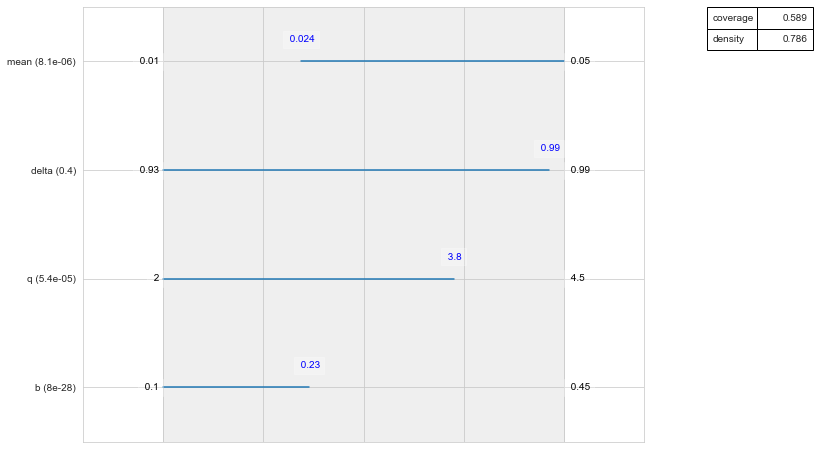

In [28]:
box1.inspect(34, style='graph')
plt.show()

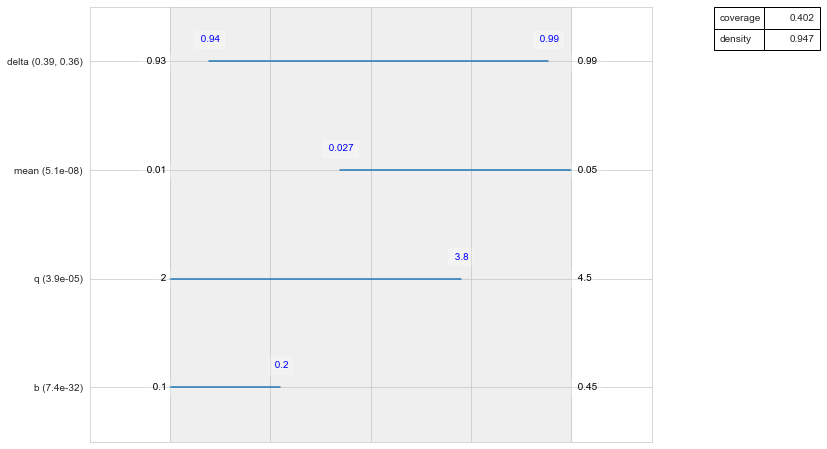

In [29]:
box1.inspect(style='graph')
plt.show()

In [30]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

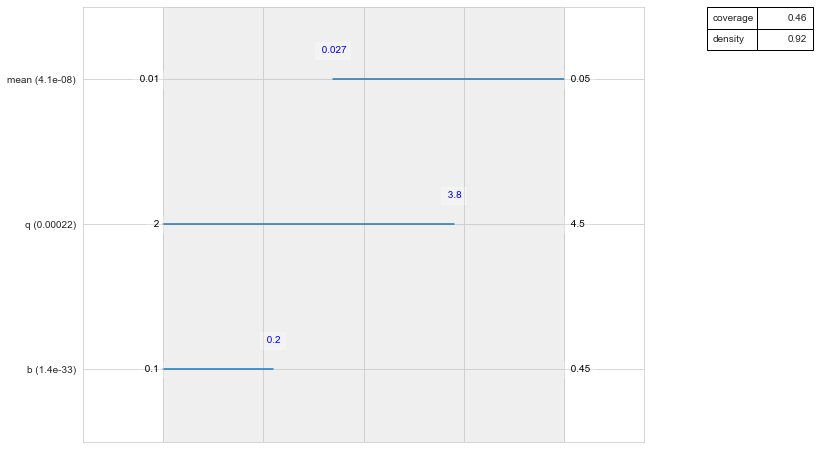

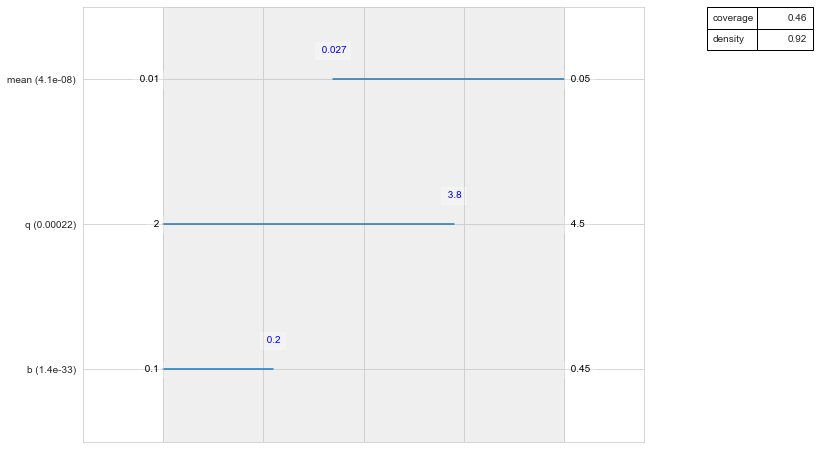

In [33]:
box1.inspect(style='graph')
box1.drop_restriction('delta')
box1.inspect(style='graph')
plt.show()

In [34]:
n_scenarios = 1000
n_policies = 4

with MultiprocessingEvaluator(lake_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios, n_policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2800 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [36]:
experiments.head()

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.395276,0.939553,0.038338,2.091485,0.004310,0.02816,0.047789,0.016306,0.069949,0.057479,...,0.067849,0.047975,0.004283,0.067117,0.057831,0.096201,0.09077,3000,0,lakeproblem
1,0.153393,0.977142,0.028505,3.180312,0.004842,0.02816,0.047789,0.016306,0.069949,0.057479,...,0.067849,0.047975,0.004283,0.067117,0.057831,0.096201,0.09077,3001,0,lakeproblem
2,0.357353,0.962547,0.019916,3.059902,0.002541,0.02816,0.047789,0.016306,0.069949,0.057479,...,0.067849,0.047975,0.004283,0.067117,0.057831,0.096201,0.09077,3002,0,lakeproblem
3,0.417382,0.978621,0.021716,2.510567,0.004901,0.02816,0.047789,0.016306,0.069949,0.057479,...,0.067849,0.047975,0.004283,0.067117,0.057831,0.096201,0.09077,3003,0,lakeproblem
4,0.440154,0.979996,0.019590,2.894708,0.003561,0.02816,0.047789,0.016306,0.069949,0.057479,...,0.067849,0.047975,0.004283,0.067117,0.057831,0.096201,0.09077,3004,0,lakeproblem


In [37]:
experiments.policy.unique()

array([0, 1, 2, 3], dtype=object)

In [40]:
cleanded = experiments.drop(columns=[l.name for l in lake_model.levers])

In [41]:
cleanded.head()

,b,delta,mean,q,stdev,scenario,policy,model
0,0.395276,0.939553,0.038338,2.091485,0.004310,3000,0,lakeproblem
1,0.153393,0.977142,0.028505,3.180312,0.004842,3001,0,lakeproblem
2,0.357353,0.962547,0.019916,3.059902,0.002541,3002,0,lakeproblem
3,0.417382,0.978621,0.021716,2.510567,0.004901,3003,0,lakeproblem
4,0.440154,0.979996,0.019590,2.894708,0.003561,3004,0,lakeproblem


In [44]:
x = cleanded
y = outcomes['max_P'] > 10

primalg = prim.Prim(x,y, 0.8, peel_alpha=0.1)
box1 = primalg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 4000 points remaining, containing 100 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.46296296296296297, returning dump box


In [43]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

[MainProcess/INFO] model dropped from analysis because only a single category


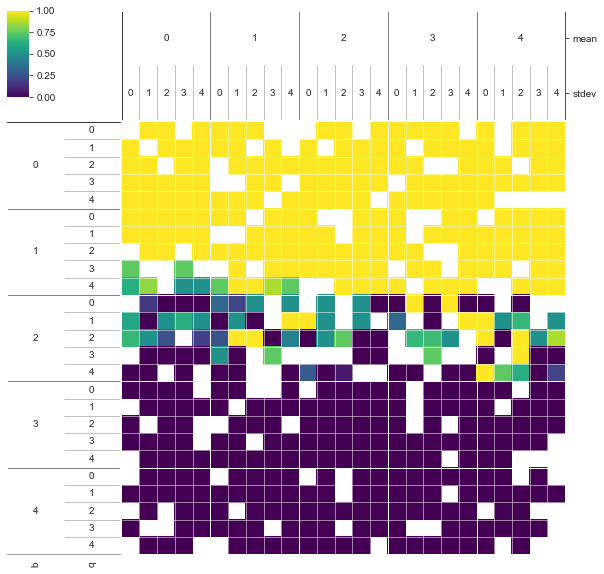

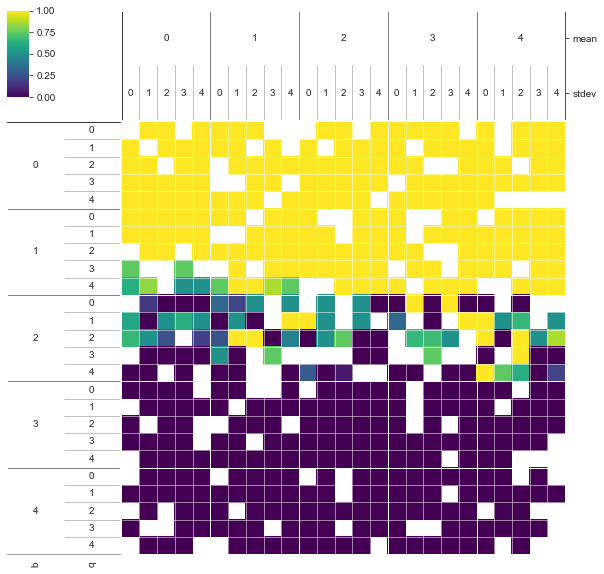

In [54]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['max_P'] > 4

dimensional_stacking.create_pivot_plot(x,y, nr_levels=2, nbins=5)
plt.show()

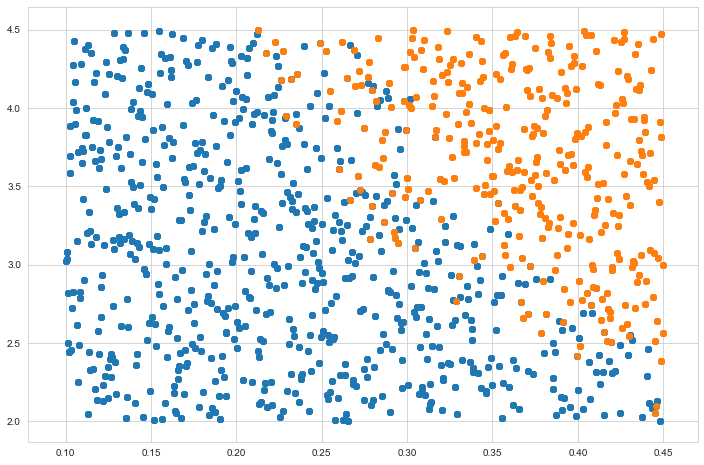

In [49]:
fig, ax = plt.subplots()

ax.scatter(experiments.b[y], experiments.q[y])
ax.scatter(experiments.b[y==False], experiments.q[y==False])
plt.show()